#### Select two classes and features which are linearly seprable from Iris dataset 

Adaline code with using stochastic gradient decent

In [1]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits import mplot3d


seed = np.random.seed

iris = datasets.load_iris()

X = iris.data[0:100, [0,1, 3]]

y = iris.target[50:150]

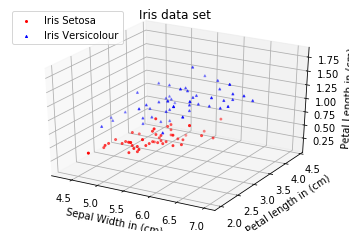

In [2]:
fig = plt.figure()



ax = plt.axes(projection='3d')

ax.set_title('Iris data set')

ax.set_xlabel("Sepal Width in (cm)")
ax.set_ylabel("Petal length in (cm)")
ax.set_zlabel("Petal Length in (cm)")


ax.scatter(X[:50, 0], X[:50, 1],X[:50,2], color='red', 
           marker='o', s=4, edgecolor='red', label="Iris Setosa")
ax.scatter(X[50:100, 0], X[50:100, 1],X[50:100,2], color='blue', 
           marker='^', s=4, edgecolor='blue', label="Iris Versicolour")

plt.legend(loc='upper left')
plt.show()



In [3]:
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    shuffle : bool (default: True)
        Shuffles training data every epoch if True to prevent cycles.
    random_state : int
        Set random state for shuffling and initializing the weights.
        
    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state : seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : array-like; shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like; shape = [n_samples]
            Target values or labels.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, yi in zip(X, y):
                cost.append(self._update_weights(xi, yi))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Randomly initialize weights"""
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, yi):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(xi)
        
        # Cost function
        error = (yi - output)
        cost = 0.5 * error**2
        
        # Update rule
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1)

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, yi in zip(X, y):
                self._update_weights(xi, yi)
        else:
            self._update_weights(X, y)
        return self

#### Splitting data into 70% training and 30% test data & Standarizing the features.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)



sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [ 0 50 50]
Labels count in y_train: [ 0 35 35]
Labels count in y_test: [ 0 15 15]


#### Training Adaline via Ski-Kit Learn

In [5]:
from sklearn.metrics import accuracy_score


adas = AdalineSGD(n_iter=200, eta=0.01, random_state=1)
adas.fit(X_train_std, y_train)


# Testing accuracy
y_pred = adas.predict(X_test_std)

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


Accuracy: 0.50


In [6]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 15


In [7]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.500


Training a perceptron model using the standardized training data: